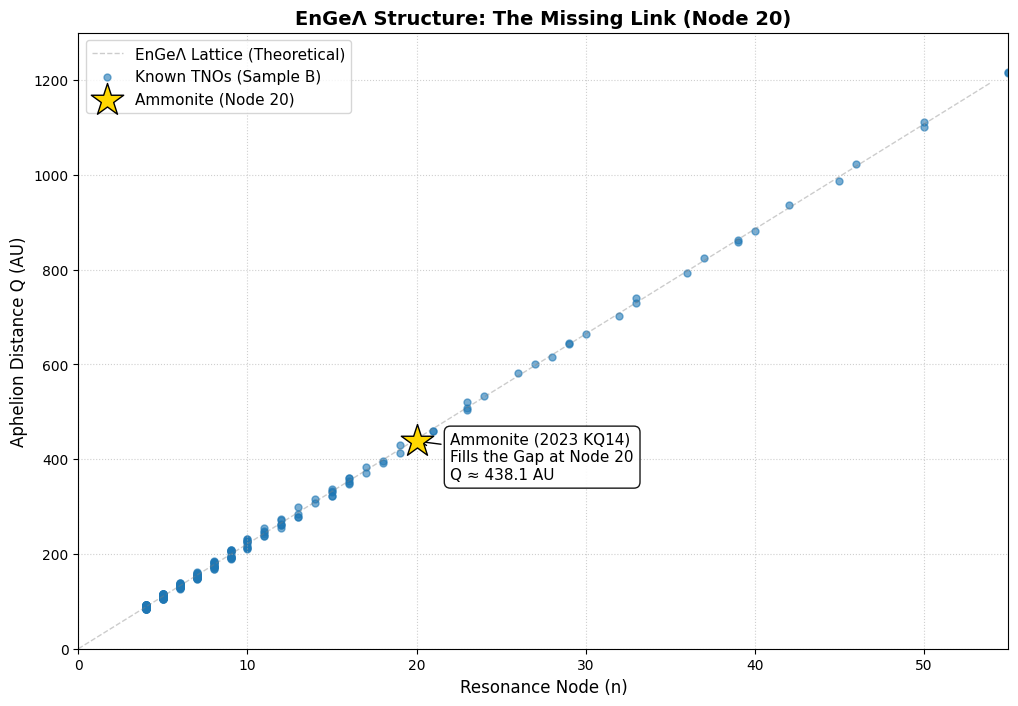

Картинка 1 сохранена: engel_structure_corrected.png


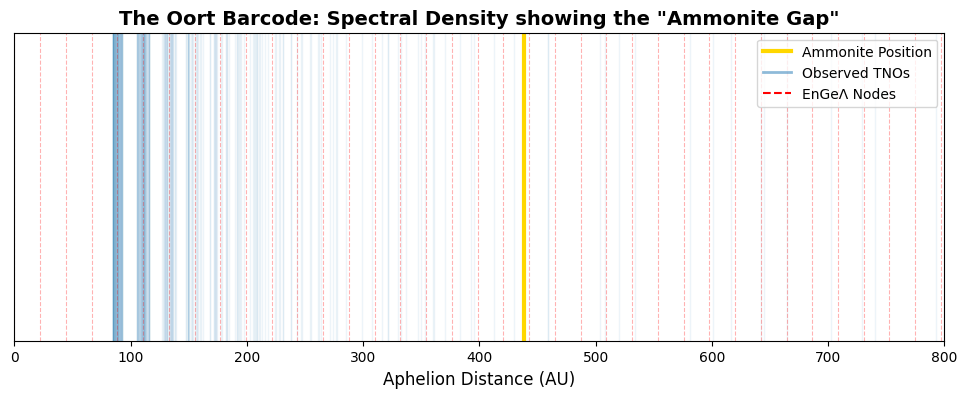

Картинка 2 сохранена: engel_barcode_corrected.png


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# НАСТРОЙКИ
# ---------------------------------------------------------
FILE_NAME = 'sap_stats.csv'
AMMONITE_Q = 438.1           # Афелий Аммонита (2023 KQ14)
LATTICE_STEP = 22.14         # Шаг решетки EnGeL
COLOR_DOTS = '#1f77b4'       # Синий цвет для обычных объектов
COLOR_AMMONITE = 'gold'      # Золотой цвет для Аммонита
DPI = 300                    # Качество картинки

# ---------------------------------------------------------
# 1. ПОДГОТОВКА ДАННЫХ
# ---------------------------------------------------------
try:
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    df = pd.DataFrame({'Node (n)': [], 'Aphelion (Q)': []}) # Заглушка, если файла нет

# Генерируем теоретическую решетку (от 0 до 55 узлов)
# Это нужно, чтобы нарисовать даже пустые ступени, которых нет в файле
theoretical_nodes = np.arange(0, 55)
theoretical_qs = theoretical_nodes * LATTICE_STEP

# Высчитываем, на какой узел садится Аммонит
ammonite_node_int = round(AMMONITE_Q / LATTICE_STEP) # Округляем 19.78 до 20

# ---------------------------------------------------------
# 2. ГРАФИК 1: ЛЕСТНИЦА (STRUCTURE)
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))

# Рисуем серую сетку (идеальная теория)
plt.plot(theoretical_nodes, theoretical_qs, '--',
         color='gray', alpha=0.4, linewidth=1, label='EnGeΛ Lattice (Theoretical)')

# Рисуем синие точки (твои 694 объекта)
if not df.empty:
    plt.scatter(df['Node (n)'], df['Aphelion (Q)'],
                alpha=0.6, s=25, color=COLOR_DOTS, label=f'Known TNOs (Sample B)')

# Рисуем Аммонит (Большая Звезда на Узле 20)
plt.scatter(ammonite_node_int, AMMONITE_Q,
            color=COLOR_AMMONITE, marker='*', s=600, edgecolors='black',
            label=f'Ammonite (Node {ammonite_node_int})', zorder=10)

# Добавляем красивую подпись со стрелочкой
plt.annotate(f'Ammonite (2023 KQ14)\nFills the Gap at Node {ammonite_node_int}\nQ ≈ {AMMONITE_Q} AU',
             xy=(ammonite_node_int, AMMONITE_Q),
             xytext=(ammonite_node_int + 2, AMMONITE_Q - 80),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=11,
             bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", alpha=0.9))

plt.xlabel('Resonance Node (n)', fontsize=12)
plt.ylabel('Aphelion Distance Q (AU)', fontsize=12)
plt.title(f'EnGeΛ Structure: The Missing Link (Node {ammonite_node_int})', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(0, 55)    # Показываем только первые 55 узлов
plt.ylim(0, 1300)  # Ограничиваем высоту

plt.savefig('engel_structure_corrected.png', dpi=DPI, bbox_inches='tight')
plt.show()
print("Картинка 1 сохранена: engel_structure_corrected.png")

# ---------------------------------------------------------
# 3. ГРАФИК 2: ШТРИХ-КОД (BARCODE)
# ---------------------------------------------------------
plt.figure(figsize=(12, 4))

# Рисуем каждый объект как тонкую синюю линию
for q in df['Aphelion (Q)']:
    plt.axvline(x=q, color=COLOR_DOTS, alpha=0.08, linewidth=1)

# Рисуем идеальную решетку как красные пунктиры
for q_ideal in theoretical_qs:
    if q_ideal > 1000: break # Не рисуем слишком далеко
    plt.axvline(x=q_ideal, color='red', alpha=0.3, linestyle='--', linewidth=0.8)

# Рисуем Аммонит как жирную золотую линию
plt.axvline(x=AMMONITE_Q, color=COLOR_AMMONITE, linewidth=3, label='Ammonite Position')

# Фиктивные линии для легенды (чтобы цвета отобразились правильно)
plt.plot([], [], color=COLOR_DOTS, alpha=0.5, linewidth=2, label='Observed TNOs')
plt.plot([], [], color='red', linestyle='--', label='EnGeΛ Nodes')

plt.xlim(0, 800) # Зумим на начало, где всё самое интересное
plt.xlabel('Aphelion Distance (AU)', fontsize=12)
plt.yticks([]) # Убираем ось Y
plt.title('The Oort Barcode: Spectral Density showing the "Ammonite Gap"', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')

plt.savefig('engel_barcode_corrected.png', dpi=DPI, bbox_inches='tight')
plt.show()
print("Картинка 2 сохранена: engel_barcode_corrected.png")